Data Loaded: 61 clusters
mean residual: 0.0
standard deviation of residual: 1.267
lower dividing line: -2.083
upper dividing line: 2.083
list of possible accreted clusters
       Object    AltName   FeH    Age  Residual
2      NGC362   Dunlop62 -1.26  10.00 -2.106017
4     NGC1851  Dunlop508 -1.13   7.64 -4.323405
59    Terzan7       NONE -0.12   7.40 -3.455415
60  Palomar12       NONE -0.81   8.60 -3.012359


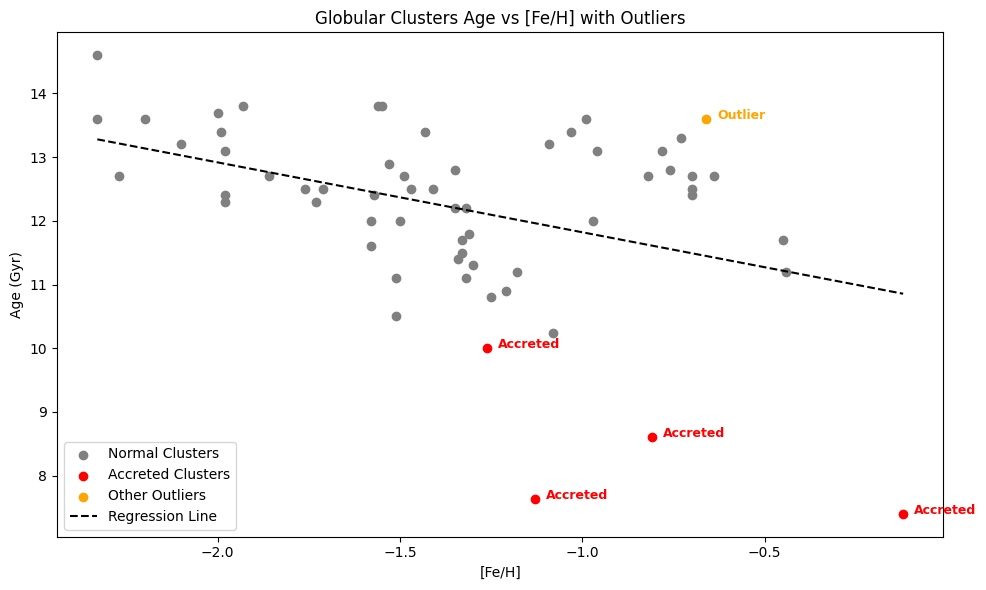

In [ ]:
# Testing out the outlier picker - Kelvin
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as stats
from scipy.stats import norm 
def outlier(probability, df):
    slope, intercept, *_ = stats.linregress(df['FeH'], df['Age'])
    df['Predicted_Age'] = intercept + slope * df['FeH']
    df['Residual'] = df['Age'] - df['Predicted_Age']
    mu = st.mean(df['Residual'])
    std = np.std(df['Residual'])
    if probability > 0.5:
        upprDvdingLine = norm.ppf(probability, mu, std)
        lwrDvdLine = norm.ppf(1 - probability, mu, std)
    else:
        upprDvdingLine = norm.ppf(1 - probability, mu, std)
        lwrDvdLine = norm.ppf(probability, mu, std)
    accreted = df[df['Residual'] < lwrDvdLine]
    other_outliers = df[df['Residual'] > upprDvdingLine]
    normal = df[(df['Residual'] >= lwrDvdLine) & (df['Residual'] <= upprDvdingLine)]

    print("mean residual:", round(mu, 3))
    print("standard deviation of residual:", round(std, 3))
    print("lower dividing line:", round(lwrDvdLine, 3))
    print("upper dividing line:", round(upprDvdingLine, 3))
    print("list of possible accreted clusters")
    print(accreted[['Object', 'AltName', 'FeH', 'Age', 'Residual']])

    return normal, accreted, other_outliers, slope, intercept, lwrDvdLine, upprDvdingLine

def starter():
    df = pd.read_csv('Krause21.csv')
    print("Data Loaded:", len(df), "clusters")
    normal, accreted, other_outliers, slope, intercept, lwrDvdLine, upprDvdingLine = outlier(0.95, df)
    return normal, accreted, other_outliers, slope, intercept, df, lwrDvdLine, upprDvdingLine

normal, accreted, other_outliers, slope, intercept, df, lwrDvdLine, upprDvdingLine = starter()
plt.figure(figsize=(10, 6))
plt.scatter(normal['FeH'], normal['Age'], color='grey', label='Normal Clusters')
plt.scatter(accreted['FeH'], accreted['Age'], color='red', label='Accreted Clusters')
plt.scatter(other_outliers['FeH'], other_outliers['Age'], color='orange', label='Other Outliers')
x_vals = np.linspace(df['FeH'].min(), df['FeH'].max(), 100)
plt.plot(x_vals, intercept + slope * x_vals, color='black', linestyle='--', label='Regression Line')
# Plot upper and lower dividing lines
plt.plot(x_vals, intercept + slope * x_vals + upprDvdingLine, color='blue', linestyle=':', label='Upper Dividing Line')
plt.plot(x_vals, intercept + slope * x_vals + lwrDvdLine, color='green', linestyle=':', label='Lower Dividing Line')
for _, row in accreted.iterrows():
    plt.text(row['FeH']+0.03, row['Age'], 'Accreted', fontsize=9, color='red', weight='bold')
for _, row in other_outliers.iterrows():
    plt.text(row['FeH']+0.03, row['Age'], 'Outlier', fontsize=9, color='orange', weight='bold')

plt.xlabel('[Fe/H]')
plt.ylabel('Age (Gyr)')
plt.title('Globular Clusters Age vs [Fe/H] with Outliers')
plt.legend()
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()
